In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import torch

In [3]:
PATH='order/'

In [4]:
num_df = pd.read_csv('ivr_backup_data/order_num_df.csv')
cat_df = pd.read_csv('ivr_backup_data/order_category_df.csv')
target_df = pd.read_csv('ivr_backup_data/target_df.csv')

In [5]:
num_df.columns

Index(['FRAUDNET_SCORE', 'TOTAL_PRICE', 'PRICE3', 'PRICE4', 'PRICE5',
       'NUM_PORTIN', 'ACNT_BILL_FNAME_MATCHES', 'ACNT_BILL_LNAME_MATCHES',
       'ACNT_SHIP_FNAME_MATCHES', 'ACNT_SHIP_LNAME_MATCHES',
       'SHIP_BILL_FNAME_MATCHES', 'SHIP_BILL_LNAME_MATCHES',
       'BILL_SHIP_ADDR_MATCHES', 'EMAIL', 'IP_ADDRESS', 'PHONE_MATCHES',
       'NUM_BYOD', 'INSTALLMENT_AMOUNT', 'ONETIMECHARGE',
       'MONTHLYRECURRINGCHARGE', 'BYOD_RETRY_COUNT', 'PREORDER_LINES',
       'ALLOWED_LINES', 'APPROVED_LINES', 'EXTERNAL_APPROVED_LINES',
       'FIRST_PARTY_ID_SCORE', 'THIRD_PARTY_ID_SCORE', 'PRICE1', 'PRICE2',
       'ORDER_CREATED_DATE'],
      dtype='object')

In [6]:
num_df.shape

(244154, 30)

In [7]:
num_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,BYOD_RETRY_COUNT,PREORDER_LINES,ALLOWED_LINES,APPROVED_LINES,EXTERNAL_APPROVED_LINES,FIRST_PARTY_ID_SCORE,THIRD_PARTY_ID_SCORE,PRICE1,PRICE2,ORDER_CREATED_DATE
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,0,0.0,5,5,0,553,520,599.99,599.99,1.558789e+09
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,4,0,0,485,502,0.00,0.00,1.571514e+09
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,4,0.0,5,5,0,370,361,999.99,0.00,1.568388e+09
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,0,0.0,4,0,4,504,554,549.99,0.00,1.568843e+09
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,0,0.0,3,5,0,386,517,469.99,0.00,1.570415e+09


In [8]:
cat_df.head()

,EXPERIAN_RESPONSE_1,EXPERIAN_RESPONSE_2,ORDER_EXCHANGE,TPF_HIGH_YELLOW,IDA_RESULT,BLACKLIST_EMAIL,FRAUDNET_RESULT,YELLOW_SKU,SHIPPING_STATE,SALES_CHANNEL,...,DEVICE_AT_HOME,FPF_HIGH_YELLOW,DENIAL_OF_SERVICES,SHIPPINGMETHOD,EXTERNAL_CREDIT_CHECK_DONE,SKU_vector,carrier_vector,make_vector,type_vector,model_vector
0,NaN,NaN,NaN,N,GREEN,N,NaN,N,MN,TELESALES,...,N,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, ...","[1, 0, 4, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ..."
1,NaN,NaN,NaN,N,GREEN,N,NaN,N,MN,ONLINE,...,Y,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[21, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NaN,NaN,NaN,N,GREEN,N,NaN,N,MN,TELESALES,...,N,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NaN,NaN,NaN,N,GREEN,N,NaN,N,MN,TELESALES,...,N,N,N,2Days,Y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,NaN,NaN,NaN,N,GREEN,N,NaN,N,MN,ONLINE,...,Y,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
cat_df['EXPERIAN_RESPONSE_1'].unique()

array([nan, '3100/ACCEPT/Continue/ACCEPT- FraudNet only',
       '3100/REFER/Continue and Investigate/Suspicious fraud device indicators - medium',
       '3100/REFER/Continue and Investigate/Suspicious fraud device indicators - high',
       '3100/NODECISION/No Decision/Error Or No Decision From FS'],
      dtype=object)

In [10]:
cat_df.shape

(244154, 26)

In [11]:
target_df.columns

Index(['ACTIVE_WATCH_RESULT'], dtype='object')

In [12]:
target_df.head()

,ACTIVE_WATCH_RESULT
0,0
1,1
2,1
3,1
4,1


In [13]:
target_df.shape

(244154, 1)

In [14]:
ivr_df = pd.concat([num_df, cat_df, target_df], axis=1)

In [15]:
ivr_df.head()

,FRAUDNET_SCORE,TOTAL_PRICE,PRICE3,PRICE4,PRICE5,NUM_PORTIN,ACNT_BILL_FNAME_MATCHES,ACNT_BILL_LNAME_MATCHES,ACNT_SHIP_FNAME_MATCHES,ACNT_SHIP_LNAME_MATCHES,...,FPF_HIGH_YELLOW,DENIAL_OF_SERVICES,SHIPPINGMETHOD,EXTERNAL_CREDIT_CHECK_DONE,SKU_vector,carrier_vector,make_vector,type_vector,model_vector,ACTIVE_WATCH_RESULT
0,0.0,1554.60,119.99,119.99,0.0,0,1,1,1,1,...,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, ...","[1, 0, 4, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...",0
1,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[21, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,0.0,1080.09,0.00,0.00,0.0,1,1,1,1,1,...,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,0.0,593.97,0.00,0.00,0.0,0,1,1,1,1,...,N,N,2Days,Y,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,0.0,0.00,0.00,0.00,0.0,1,1,1,1,1,...,N,N,2Days,N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[13, 0, 0, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 0, 1, 0, 0]","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [16]:
ivr_df.shape

(244154, 57)

In [17]:
reduced_ivr = ivr_df.sample(n=10000)

In [18]:
reduced_ivr.shape

(10000, 57)

In [19]:
# ivr_df.dtypes

In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(reduced_ivr, test_size=0.2)

In [21]:
# train_df = pd.read_feather(f'{PATH}joined')
# test_df = pd.read_feather(f'{PATH}joined_test')

In [22]:
len(train_df),len(test_df)

(8000, 2000)

In [23]:
import sys
# sys.path.append("/mnt/azmnt/code/Users/bho829/fastai")
sys.path.append("/mnt/azmnt/code/Users/bho829/fastai/fastai")

In [24]:
from xfinity.fastai.tabular.transform import *

In [25]:
procs=[FillMissing, Categorify, Normalize]

In [26]:
vec_vars = []   # leave out for now
cat_vars = ['EXPERIAN_RESPONSE_1', 'EXPERIAN_RESPONSE_2', 'ORDER_EXCHANGE',
       'TPF_HIGH_YELLOW', 'IDA_RESULT', 'BLACKLIST_EMAIL', 'FRAUDNET_RESULT',
       'YELLOW_SKU', 'SHIPPING_STATE', 'SALES_CHANNEL', 'BILLING_STATE',
       'ACCOUNT_NUMBER', 'IS_EXISTING_CUSTOMER', 'LINE_LIMIT_REACHED',
       'SSN_BLACKLISTED', 'INTERNAL_CREDIT_CHECK_DONE', 'DEVICE_AT_HOME',
       'FPF_HIGH_YELLOW', 'DENIAL_OF_SERVICES', 'SHIPPINGMETHOD',
       'EXTERNAL_CREDIT_CHECK_DONE']
cont_vars = ['FRAUDNET_SCORE',
 'TOTAL_PRICE',
 'PRICE3',
 'PRICE4',
 'PRICE5',
 'NUM_PORTIN',
 'ACNT_BILL_FNAME_MATCHES',
 'ACNT_BILL_LNAME_MATCHES',
 'ACNT_SHIP_FNAME_MATCHES',
 'ACNT_SHIP_LNAME_MATCHES',
 'SHIP_BILL_FNAME_MATCHES',
 'SHIP_BILL_LNAME_MATCHES',
 'BILL_SHIP_ADDR_MATCHES',
 'EMAIL',
 'IP_ADDRESS',
 'PHONE_MATCHES',
 'NUM_BYOD',
 'INSTALLMENT_AMOUNT',
 'ONETIMECHARGE',
 'MONTHLYRECURRINGCHARGE',
 'BYOD_RETRY_COUNT',
 'PREORDER_LINES',
 'ALLOWED_LINES',
 'APPROVED_LINES',
 'EXTERNAL_APPROVED_LINES',
 'FIRST_PARTY_ID_SCORE',
 'THIRD_PARTY_ID_SCORE',
 'PRICE1',
 'PRICE2',
 'ORDER_CREATED_DATE']

In [27]:
# vec_vars = []
# cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
#     'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
#     'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
#     'SchoolHoliday_fw', 'SchoolHoliday_bw']

# cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
#    'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
#    'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
#    'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [28]:
# train_df['CompetitionDistance'].head(20)

In [29]:
len(cat_vars)

21

In [30]:
len(cont_vars)

30

In [31]:
dep_var = 'ACTIVE_WATCH_RESULT'
df = train_df[vec_vars + cat_vars + cont_vars + [dep_var]].copy()

In [32]:
# test_df['Date'].min(), test_df['Date'].max()

In [33]:
# cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
# cut

In [34]:
train_df.shape

(8000, 57)

In [35]:
test_df.shape

(2000, 57)

In [36]:
# valid_idx = range(cut)

In [37]:
df[dep_var].head()

67060     1
158880    1
243566    1
202928    0
37954     1
Name: ACTIVE_WATCH_RESULT, dtype: int64

In [38]:
from xfinity.fastai.tabular.data import *

In [39]:
path = PATH

In [40]:
from xfinity.fastai.data_block import FloatList

In [41]:
valid_idx = range(0, 40000)

In [42]:
data = (TabularList.from_df(df, path=path, vec_names=vec_vars, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .random_split_by_pct(valid_pct=0.2, seed=43)
                .label_from_df(cols = dep_var)
                .add_test(TabularList.from_df(test_df, path=path, vec_names=vec_vars, cat_names=cat_vars, cont_names=cont_vars), label=0)
                .databunch())

/mnt/azmnt/code/Users/bho829/IVR/xfinity/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [43]:
type(data)

xfinity.fastai.tabular.data.TabularDataBunch

In [44]:
# data.x

In [45]:
# from xfinity.fastai.gen_doc.nbdoc import doc

# doc(FloatList)

In [46]:
from xfinity.fastai.torch_core import *

In [47]:
from xfinity.fastai.tabular.learner import tabular_ext_learner

In [48]:
from xfinity.fastai.metrics import accuracy

In [49]:
learn = tabular_ext_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        metrics=accuracy)


In [50]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [47]:
# learn.data.train_dl

In [48]:
# for i, dl in enumerate(learn.data.train_dl):
#     if i > 0:
#         break
#     print('i={}'.format(i))
#     print(dl)


In [49]:
# learn.model

In [50]:
# len(data.train_ds.cont_names)

In [50]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


epoch 0
self.sched.is_done=False
self.stop_div=True
smooth_loss=nan
self.best_loss=inf
torch.isnan(smooth_loss)=True
call break on epoch end
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


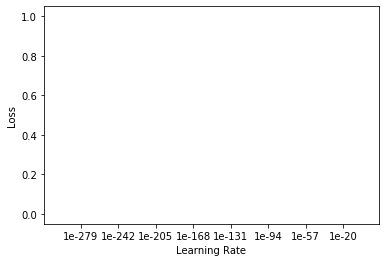

In [53]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.804467,0.587540,0.826875,00:04
1,0.536634,0.438359,0.859375,00:04
2,0.263813,0.424757,0.864375,00:04
3,0.095902,0.505493,0.864375,00:04
4,0.033348,0.494554,0.863750,00:04


epoch 0
do validation in fit
epoch 1
do validation in fit
epoch 2
do validation in fit
epoch 3
do validation in fit
epoch 4
do validation in fit


In [ ]:
learn.save('1')

ValueError: zero-size array to reduction operation minimum which has no identity

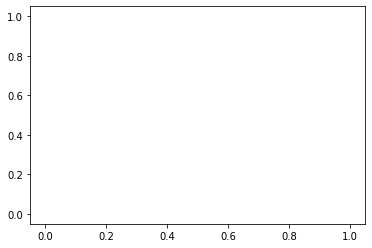

In [52]:
learn.recorder.plot_losses(skip_start=10000)

In [59]:
learn.model

TabularExtModel(
  (vecs): ModuleList()
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(126, 24)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(4, 3)
    (5): Embedding(3, 3)
    (6): Embedding(6, 4)
    (7): Embedding(3, 3)
    (8): Embedding(41, 13)
    (9): Embedding(4, 3)
    (10): Embedding(52, 15)
    (11): Embedding(133535, 600)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(2, 2)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(4, 3)
    (20): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=734, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=Fals

In [53]:
# learn.model.parameters

In [67]:
learn.model.embeds[0]

Embedding(5, 4)

In [73]:
type(learn.model.embeds[0])

torch.nn.modules.sparse.Embedding

In [56]:
# learn.model.embeds[0].weight

In [55]:
learn.model.embeds[0].weight.data

tensor([[ 0.0121, -0.0161, -0.0039,  0.0194],
        [ 0.0035, -0.0393,  0.0149,  0.0373],
        [ 0.0125,  0.0003,  0.0049, -0.0053],
        [-0.0096,  0.0252, -0.0289, -0.0060],
        [-0.0226,  0.0658, -0.0326, -0.0405]])

In [68]:
learn.load('1');

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012393,0.016367,0.116766,13:39
